In [45]:
import pandas as pd
import numpy as np

In [46]:
df_train = pd.read_csv('train.csv')

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

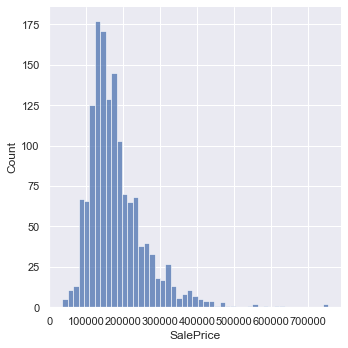

In [48]:
sns.displot(df_train['SalePrice'])

<Figure size 432x288 with 0 Axes>

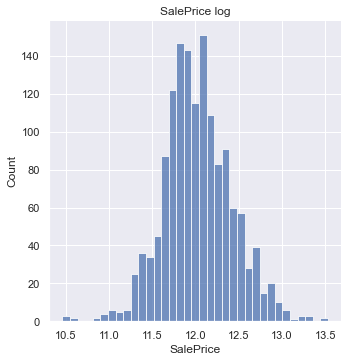

In [49]:
plt.figure()
sns.displot(np.log(df_train['SalePrice']))
plt.title('SalePrice log')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

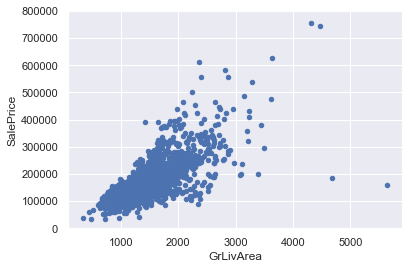

In [51]:
# 面积
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

J:\DataLearning\conda\envs\gluon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea'>

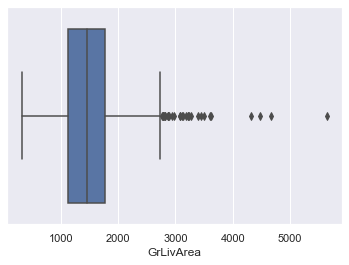

In [52]:
sns.boxplot(df_train['GrLivArea'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

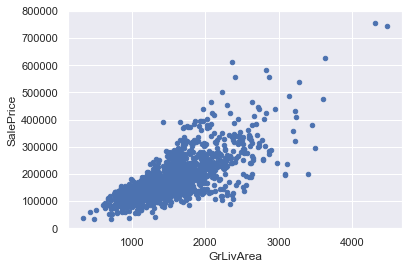

In [53]:
df_train.drop(df_train[(df_train.GrLivArea > 4500 ) & (df_train.SalePrice <300000)].index,inplace=True)
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

J:\DataLearning\conda\envs\gluon\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GrLivArea'>

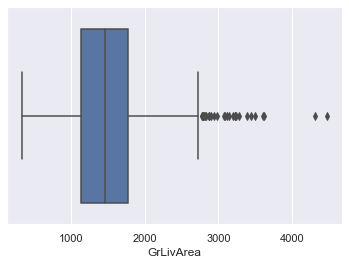

In [54]:
sns.boxplot(df_train['GrLivArea'])

In [ ]:
# 总房间数
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

In [ ]:
# 将不是object，而是数值的数据的列的名称取出来，顺带除去id
quantitative = [feature for feature in df_train.columns if df_train.dtypes[feature] != 'object']
quantitative.remove('Id')
# 房价自己也要除去
quantitative.remove('SalePrice')
quantitative

In [ ]:
m_cont = pd.melt(df_train, value_vars=quantitative)
g = sns.FacetGrid(m_cont, col='variable', col_wrap=3, sharex=False, sharey=False,height=4)
g.map(sns.histplot, 'value')

In [ ]:
df_train['MSSubClass'].describe()

In [ ]:
m_cont = pd.melt(df_train,id_vars='SalePrice',value_vars = quantitative)
g = sns.FacetGrid(m_cont,col='variable',col_wrap=3,sharex=False,sharey=True,height=5)
g.map(plt.scatter,'value','SalePrice')